<a href="https://www.kaggle.com/code/yehoryevtushenko/lesson24-04-2024?scriptVersionId=173781104" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
import pandas as pd

business = pd.read_csv("/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/business_data.csv")
business.head()

,headlines,description,content,url,category
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business
3,Red Sea woes: Exporters seek increased credit ...,Rising attacks forced shippers to consider the...,Indian exporters have asked the central govern...,https://indianexpress.com/article/business/red...,business
4,Air India group to induct a plane every 6 days...,"Apart from fleet expansion, 2024 will also see...",The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business


In [3]:
business_new = business.drop(columns=['headlines', 'description', 'url']).rename(columns={'content': 'text'})
business_new.head()

,text,category
0,"Sitharaman, the first full-time woman finance ...",business
1,The merger of Tata group’s budget airlines Air...,business
2,The Air India group plans to induct one aircra...,business
3,Indian exporters have asked the central govern...,business
4,The Air India group plans to induct one aircra...,business


In [4]:
education = pd.read_csv("/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/education_data.csv")
education.head()

,headlines,description,content,url,category
0,CUET PG 2024: Register with NTA to enable admi...,CUET PG 2024: UGC said that the list of partic...,The Common University Entrance Test Postgradua...,https://indianexpress.com/article/education/cu...,education
1,Oxford ends ties with TCS iON over technical g...,"On April 10, 2023 TCS had announced that it ha...",Less than a year after the Oxford University s...,https://indianexpress.com/article/education/ox...,education
2,"Enrollments in Computer Engineering surge, mec...",AISHE Report 2021-22: The enrollment in STEM (...,Student enrollments in Computer Engineering ha...,https://indianexpress.com/article/education/en...,education
3,"NDMC plans to provide free JEE, NEET UG coachi...",The coaching partner will also provide up-to-d...,The New Delhi Municipal Council (NDMC) is invi...,https://indianexpress.com/article/education/nd...,education
4,"BA courses register highest enrollment, maximu...",AISHE Report 2021-22: For programmes including...,Bachelor of Arts (BA) courses had the highest ...,https://indianexpress.com/article/education/ba...,education


In [5]:
education_new = education.drop(columns=['headlines', 'description', 'url']).rename(columns={'content': 'text'})
education_new.head()

,text,category
0,The Common University Entrance Test Postgradua...,education
1,Less than a year after the Oxford University s...,education
2,Student enrollments in Computer Engineering ha...,education
3,The New Delhi Municipal Council (NDMC) is invi...,education
4,Bachelor of Arts (BA) courses had the highest ...,education


In [6]:
entertainment = pd.read_csv("/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/entertainment_data.csv")
entertainment.head()

,headlines,description,content,url,category
0,Bhumi Pednekar plays an investigative journali...,Bhumi Pednekar plays an investigative journali...,Actor Bhumi Pednekar is all set to take over t...,https://indianexpress.com/article/entertainmen...,entertainment
1,Karan Johar channels his inner Rajinikanth in ...,Karan Johar and Kiara Advani featured in a new...,Karan Johar reunited with his Lust Stories sta...,https://indianexpress.com/article/entertainmen...,entertainment
2,"‘Shah Rukh Khan is irreplaceable, actors will ...",Karan Johar opened up about the blurring lines...,Filmmaker Karan Johar declared the the concept...,https://indianexpress.com/article/entertainmen...,entertainment
3,"Years after break-up with Divya Agarwal, Varun...",Varun Sood said that it is easy for him to for...,Ever since Divya Agarwal and Varun Sood parted...,https://indianexpress.com/article/entertainmen...,entertainment
4,Guntur Kaaram box office collection Day 6: Mah...,Guntur Kaaram box office collection Day 6: Mah...,"On Tuesday (Day 5), Mahesh Babu’s latest relea...",https://indianexpress.com/article/entertainmen...,entertainment


In [7]:
entertainment_new = entertainment.drop(columns=['headlines', 'description', 'url']).rename(columns={'content': 'text'})
entertainment_new.head()

,text,category
0,Actor Bhumi Pednekar is all set to take over t...,entertainment
1,Karan Johar reunited with his Lust Stories sta...,entertainment
2,Filmmaker Karan Johar declared the the concept...,entertainment
3,Ever since Divya Agarwal and Varun Sood parted...,entertainment
4,"On Tuesday (Day 5), Mahesh Babu’s latest relea...",entertainment


In [8]:
sports = pd.read_csv("/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/sports_data.csv")
sports.head()

,headlines,description,content,url,category
0,Jannik Sinner’s strong and improved baseline g...,Baseline strategy has been central to Jannik S...,"In a resolute, nerveless, three-hour-long disp...",https://indianexpress.com/article/sports/tenni...,sports
1,Allan Border opens up about Parkinson’s diseas...,Former Australia captain says the disease has ...,Legendary Australia cricketer Allan Border has...,https://indianexpress.com/article/sports/crick...,sports
2,Australian Open 2024: Jannik Sinner stops Nova...,"Sinner defeated Djokovic 6-1, 6-2, 6-7, 6-3 in...",Jannik Sinner has stunned Novak Djokovic to re...,https://indianexpress.com/article/sports/tenni...,sports
3,‘It looked like a dead lbw’: Ben Duckett on Sh...,Duckett believes England are still in the game...,England opener Ben Duckett says Shubman Gill s...,https://indianexpress.com/article/sports/crick...,sports
4,"In crunch time, Kiran George produces an aggre...",As Kiran George had missed out on opportunitie...,"Since the start of 2023, Kiran George had play...",https://indianexpress.com/article/sports/badmi...,sports


In [9]:
sports_new = sports.drop(columns=['headlines', 'description', 'url']).rename(columns={'content': 'text'})
sports_new.head()

,text,category
0,"In a resolute, nerveless, three-hour-long disp...",sports
1,Legendary Australia cricketer Allan Border has...,sports
2,Jannik Sinner has stunned Novak Djokovic to re...,sports
3,England opener Ben Duckett says Shubman Gill s...,sports
4,"Since the start of 2023, Kiran George had play...",sports


In [10]:
technology = pd.read_csv("/kaggle/input/news-articles-classification-dataset-for-nlp-and-ml/technology_data.csv")
technology.head()

,headlines,description,content,url,category
0,Unlocking the science of E Ink displays: Why w...,That e-reader screen isn't magic - it's E Ink!...,"With their crisp, paper-like screens, e-reader...",https://indianexpress.com/article/technology/t...,technology
1,Reddit is free education: 9 subreddits that ca...,These subreddits bring the best of the Interne...,"Education is the key to success, it not only l...",https://indianexpress.com/article/technology/f...,technology
2,Nintendo Switching things up? Leaks suggest la...,Rumour has it the upcoming Nintendo Switch 2 w...,Rumours are heating up that Nintendo may unvei...,https://indianexpress.com/article/technology/g...,technology
3,Epic’s Fortnite and new browser engines show c...,The EU's antitrust regulations are forcing App...,Apple is continuing to open up iOS to comply w...,https://indianexpress.com/article/technology/t...,technology
4,Hubble finds water vapour on small exoplanet i...,Scientists have used the Hubble Space Telescop...,Astronomers used the Hubble Space Telescope to...,https://indianexpress.com/article/technology/s...,technology


In [11]:
technology_new = technology.drop(columns=['headlines', 'description', 'url']).rename(columns={'content': 'text'})
technology_new.head()

,text,category
0,"With their crisp, paper-like screens, e-reader...",technology
1,"Education is the key to success, it not only l...",technology
2,Rumours are heating up that Nintendo may unvei...,technology
3,Apple is continuing to open up iOS to comply w...,technology
4,Astronomers used the Hubble Space Telescope to...,technology


In [12]:
articles = pd.concat([business_new, education_new, entertainment_new, sports_new, technology_new], ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)
articles.head()

,text,category
0,Fast bowler Mohammed Shami is likely to miss t...,sports
1,Indian wicketkeeper-batsman KL Rahul credits h...,entertainment
2,Infosys on Thursday reported a lower-than-expe...,business
3,Tamil actor and politician Vijayakanth passed ...,entertainment
4,"Ira Khan, the daughter of Bollywood actor Aami...",entertainment


In [13]:
from torch.utils.data import Dataset
from sklearn.preprocessing import LabelEncoder
import torchtext


class MyDataset(Dataset):
    def __init__(self, X, y, max_len=100):
        self.X = X
        self.y = y
        self.max_len = max_len
        
        self.label_encoder = LabelEncoder().fit(y)
        #self.vocab = torchtext.vocab.GloVe(name='6B', dim=50)
        self.vocab = torchtext.vocab.Vectors("/kaggle/input/glove6b-50d/glove.6B.50d.txt")

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        label = self.label_encoder.transform([self.y.iloc[idx]])
        label = torch.tensor(label)
        
        text = self.X.iloc[idx]
        tokens = text.split()
        
        if len(tokens) > self.max_len:
            tokens = tokens[:self.max_len]
        else:
            diff = self.max_len - len(tokens)
            
            tokens += ['<pad>'] * diff
        
        X = self.vocab.get_vecs_by_tokens(tokens, lower_case_backup=True)
        
        return X, label[0]
    
    
dataset = MyDataset(articles['text'], articles['category'])

100%|█████████▉| 400000/400001 [00:18<00:00, 21197.41it/s]


In [14]:
dataset[0][0].shape

torch.Size([100, 50])

In [15]:
from torch.utils.data import random_split

train_ratio = 0.8

# Розділіть набір даних
train_data, test_data = random_split(dataset, [train_ratio, 1-train_ratio])

In [16]:
from torch.utils.data import DataLoader

batch_size = 32

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [17]:
from torch import nn
import torch.nn.functional as F
import numpy as np
import math

from torch import Tensor


# Код змінено для batch_first=True

class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(1, max_len, d_model)
        pe[0, :, 0::2] = torch.sin(position * div_term)
        pe[0, :, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: Tensor) -> Tensor:
        """
        Arguments:
            x: Tensor, shape ``[batch_size, seq_len, embedding_dim]``
        """
        x = x + self.pe[:, :x.size(1)]
        return self.dropout(x)

In [18]:
class TextClassifier(nn.Module):
    def __init__(self, encoding_dim, max_len, num_classes):
        super().__init__()
        
        self.pos_encoder = PositionalEncoding(d_model=encoding_dim, max_len=max_len)

        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=encoding_dim, nhead=2, batch_first=True, dim_feedforward=64),
            num_layers=1
        )

        self.flatten = nn.Flatten()

        self.linear1 = nn.Linear(encoding_dim*max_len, num_classes)

    def forward(self, x):
        out = self.pos_encoder(x)
        out = self.encoder(out)
        out = self.flatten(out)
        out = self.linear1(out)
        return out


    def predict(self, X, device='cpu'):
        X = torch.FloatTensor(np.array(X)).to(device)

        with torch.no_grad():
            y_pred = F.softmax(self.forward(X), dim=-1)

        return y_pred.cpu().numpy()


model = TextClassifier(encoding_dim=50, max_len=100, num_classes=5).to(device)
model

TextClassifier(
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=50, out_features=50, bias=True)
        )
        (linear1): Linear(in_features=50, out_features=64, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=64, out_features=50, bias=True)
        (norm1): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=5000, out_features=5, bias=True)
)

In [19]:
params_num = 0

for param in model.parameters():
    size = param.size()
    
    num = 1
    for item in size:
        num *= item
    params_num += num

params_num

41919

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)

In [21]:
import time

def train(model, optimizer, loss_fn, train_dl, val_dl,
          metrics=None, metrics_name=None, epochs=100, device='cpu', task='regression'):
    '''
    Runs training loop for classification problems. Returns Keras-style
    per-epoch history of loss and accuracy over training and validation data.

    Parameters
    ----------
    model : nn.Module
        Neural network model
    optimizer : torch.optim.Optimizer
        Search space optimizer (e.g. Adam)
    loss_fn :
        Loss function (e.g. nn.CrossEntropyLoss())
    train_dl :
        Iterable dataloader for training data.
    val_dl :
        Iterable dataloader for validation data.
    metrics: list
        List of sklearn metrics functions to be calculated
    metrics_name: list
        List of matrics names
    epochs : int
        Number of epochs to run
    device : string
        Specifies 'cuda' or 'cpu'
    task : string
        type of problem. It can be regression, binary or multiclass

    Returns
    -------
    Dictionary
        Similar to Keras' fit(), the output dictionary contains per-epoch
        history of training loss, training accuracy, validation loss, and
        validation accuracy.
    '''

    print('train() called: model=%s, opt=%s(lr=%f), epochs=%d, device=%s\n' % \
          (type(model).__name__, type(optimizer).__name__,
           optimizer.param_groups[0]['lr'], epochs, device))

    metrics = metrics if metrics else []
    metrics_name = metrics_name if metrics_name else [metric.__name__ for metric in metrics]

    history = {} # Collects per-epoch loss and metrics like Keras' fit().
    history['loss'] = []
    history['val_loss'] = []
    for name in metrics_name:
        history[name] = []
        history[f'val_{name}'] = []

    start_time_train = time.time()

    for epoch in range(epochs):

        # --- TRAIN AND EVALUATE ON TRAINING SET -----------------------------
        start_time_epoch = time.time()

        model.train()
        history_train = {name: 0 for name in ['loss']+metrics_name}

        for batch in train_dl:
            x    = batch[0].to(device)
            y    = batch[1].to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_pred = y_pred.detach().cpu().numpy()
            y = y.detach().cpu().numpy()


            history_train['loss'] += loss.item() * x.size(0)
            for name, func in zip(metrics_name, metrics):
              try:
                  history_train[name] += func(y, y_pred) * x.size(0)
              except:
                  if task == 'binary': y_pred_ = y_pred.round()
                  elif task == 'multiclass': y_pred_ = y_pred.argmax(axis=-1)
                  history_train[name] += func(y, y_pred_) * x.size(0)

        for name in history_train:
            history_train[name] /= len(train_dl.dataset)


        # --- EVALUATE ON VALIDATION SET -------------------------------------
        model.eval()
        history_val = {'val_' + name: 0 for name in metrics_name+['loss']}

        with torch.no_grad():
            for batch in val_dl:
                x    = batch[0].to(device)
                y    = batch[1].to(device)
                y_pred = model(x)
                loss = loss_fn(y_pred, y)

                y_pred = y_pred.cpu().numpy()
                y = y.cpu().numpy()

                history_val['val_loss'] += loss.item() * x.size(0)
                for name, func in zip(metrics_name, metrics):
                    try:
                        history_val['val_'+name] += func(y, y_pred) * x.size(0)
                    except:
                        if task == 'binary': y_pred_ = y_pred.round()
                        elif task == 'multiclass': y_pred_ = y_pred.argmax(axis=-1)

                        history_val['val_'+name] += func(y, y_pred_) * x.size(0)

        for name in history_val:
            history_val[name] /= len(val_dl.dataset)

        # PRINTING RESULTS

        end_time_epoch = time.time()

        for name in history_train:
            history[name].append(history_train[name])
            history['val_'+name].append(history_val['val_'+name])

        total_time_epoch = end_time_epoch - start_time_epoch

        print(f'Epoch {epoch+1:4d} {total_time_epoch:4.0f}sec', end='\t')
        for name in history_train:
            print(f'{name}: {history[name][-1]:10.3g}', end='\t')
            print(f"val_{name}: {history['val_'+name][-1]:10.3g}", end='\t')
        print()

    # END OF TRAINING LOOP

    end_time_train       = time.time()
    total_time_train     = end_time_train - start_time_train
    print()
    print('Time total:     %5.2f sec' % (total_time_train))

    return history

In [22]:
from sklearn.metrics import accuracy_score, roc_auc_score

history = train(model, optimizer, loss_fn, train_loader, test_loader,
                epochs=15,
                metrics=[accuracy_score],
                device=device,
                task='multiclass')

train() called: model=TextClassifier, opt=AdamW(lr=0.000100), epochs=15, device=cpu

Epoch    1   13sec	loss:       0.98	val_loss:       0.46	accuracy_score:       0.68	val_accuracy_score:      0.878	
Epoch    2   14sec	loss:      0.326	val_loss:      0.223	accuracy_score:      0.906	val_accuracy_score:      0.922	
Epoch    3   13sec	loss:      0.215	val_loss:      0.179	accuracy_score:      0.931	val_accuracy_score:      0.938	
Epoch    4   13sec	loss:      0.179	val_loss:      0.164	accuracy_score:      0.944	val_accuracy_score:      0.943	
Epoch    5   13sec	loss:      0.153	val_loss:      0.157	accuracy_score:      0.952	val_accuracy_score:      0.949	
Epoch    6   13sec	loss:      0.138	val_loss:      0.153	accuracy_score:      0.959	val_accuracy_score:      0.946	
Epoch    7   13sec	loss:      0.129	val_loss:       0.15	accuracy_score:      0.961	val_accuracy_score:      0.953	
Epoch    8   13sec	loss:      0.115	val_loss:      0.151	accuracy_score:      0.965	val_accuracy_score:

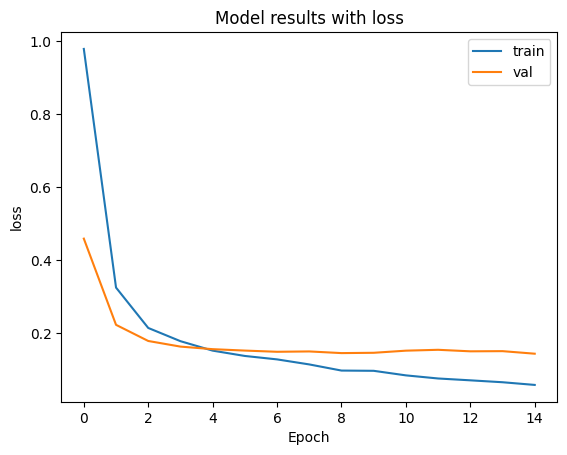

In [23]:
import matplotlib.pyplot as plt

def plot_metric(history, name):
    plt.title(f"Model results with {name}")
    plt.plot(history[name], label='train')
    plt.plot(history['val_'+name], label='val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()


plot_metric(history, 'loss')

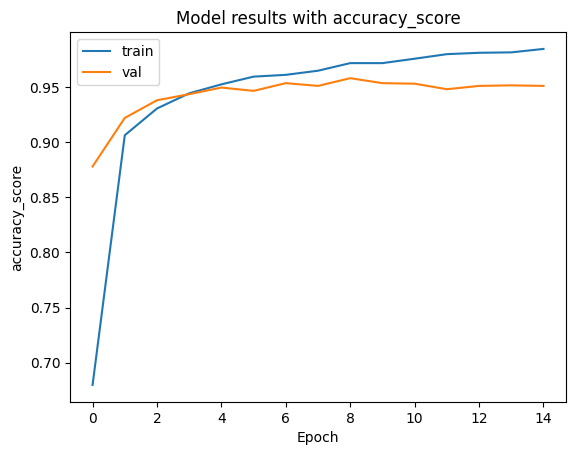

In [24]:
plot_metric(history, 'accuracy_score')

[]

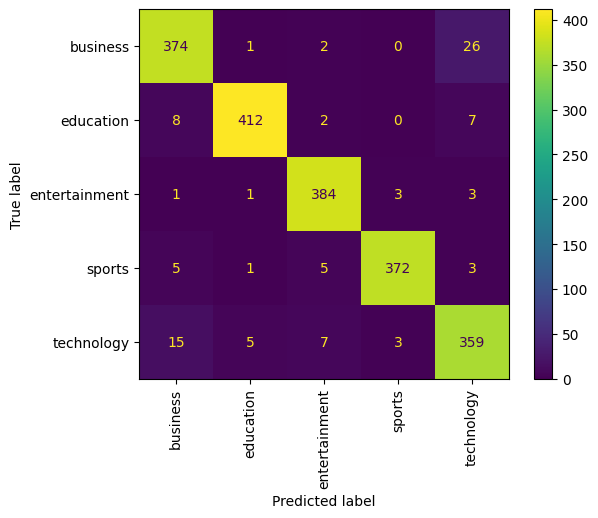

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

model = model.to('cpu')  # відключаємо від gpu

loader = torch.utils.data.DataLoader(test_data, batch_size=len(test_data))
X_test, y_test = next(iter(loader))

y_pred = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred.argmax(-1), display_labels=dataset.label_encoder.classes_)
plt.xticks(rotation=90)
plt.plot()